In [35]:
import random

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ["KMP_DUPLICATE_LIB_OK"]='TRUE'

In [36]:
# x
sale = pd.read_csv('../data/Time series data/sale.csv', index_col=0)
# y
revenue = pd.read_csv('../data/Time series data/revenue.csv', index_col=0)

sale.info()
sale.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15052 entries, 0 to 15051
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   week_1   15052 non-null  float64
 1   week_2   15052 non-null  float64
 2   week_3   15052 non-null  float64
 3   week_4   15052 non-null  float64
 4   week_5   15052 non-null  float64
 5   week_6   15052 non-null  float64
 6   week_7   15052 non-null  float64
 7   week_8   15052 non-null  float64
 8   week_9   15052 non-null  float64
 9   week_10  15052 non-null  float64
 10  week_11  15052 non-null  float64
 11  week_12  15052 non-null  float64
 12  week_13  15052 non-null  float64
 13  week_14  15052 non-null  float64
 14  week_15  15052 non-null  float64
 15  week_16  15052 non-null  float64
 16  week_17  15052 non-null  float64
 17  week_18  15052 non-null  float64
 18  week_19  15052 non-null  float64
 19  week_20  15052 non-null  float64
 20  week_21  15052 non-null  float64
 21  week_22  150

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52
count,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,...,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000,15052.000000
mean,2.373991,2.374079,2.386760,2.369365,2.390925,2.380990,2.390650,2.370621,2.381802,2.363768,...,2.369496,2.384121,2.383063,2.363420,2.384468,2.385531,2.371326,2.387824,2.395491,2.390995
std,1.083650,1.095881,1.083819,1.098046,1.084391,1.083049,1.079991,1.099412,1.083249,1.104624,...,1.091731,1.086182,1.081982,1.108570,1.085829,1.095854,1.113099,1.089533,1.115738,1.077972
min,-8.009502,-7.992483,-4.744953,-5.632819,-6.097533,-6.567091,-8.009502,-8.481057,-5.367929,-5.229729,...,-8.481057,-9.529989,-8.481057,-4.880071,-5.675433,-4.675652,-6.425318,-8.435697,-9.529989,-6.287438
25%,1.791478,1.802839,1.814614,1.778552,1.833261,1.811782,1.828376,1.800528,1.812449,1.790343,...,1.788151,1.819005,1.805862,1.791998,1.806817,1.819124,1.804890,1.807686,1.836240,1.814050
50%,2.563223,2.562490,2.562064,2.562889,2.571490,2.564377,2.570222,2.552132,2.562669,2.545383,...,2.561131,2.568527,2.563032,2.567855,2.568770,2.562895,2.568934,2.568471,2.590219,2.573671
75%,3.147875,3.154662,3.157488,3.157654,3.163058,3.157990,3.156671,3.155012,3.158665,3.156912,...,3.160052,3.157440,3.156312,3.140620,3.158223,3.177197,3.172867,3.169394,3.179056,3.158112
max,5.065280,5.086267,5.094143,4.744124,4.778071,4.898907,4.885306,5.086267,5.149720,4.788320,...,5.180371,5.149720,5.180371,5.149720,4.751501,4.768388,4.702625,4.881179,5.143515,5.180371


In [37]:
revenue.info()
revenue.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day_1   10000 non-null  float64
 1   day_2   10000 non-null  float64
 2   day_3   10000 non-null  float64
 3   day_4   10000 non-null  float64
 4   day_5   10000 non-null  float64
 5   day_6   10000 non-null  float64
 6   day_7   10000 non-null  float64
 7   day_8   10000 non-null  float64
 8   day_9   10000 non-null  float64
 9   day_10  10000 non-null  float64
 10  day_11  10000 non-null  float64
 11  day_12  10000 non-null  float64
 12  day_13  10000 non-null  float64
 13  day_14  10000 non-null  float64
 14  day_15  10000 non-null  float64
 15  day_16  10000 non-null  float64
 16  day_17  10000 non-null  float64
 17  day_18  10000 non-null  float64
 18  day_19  10000 non-null  float64
 19  day_20  10000 non-null  float64
 20  day_21  10000 non-null  float64
 21  day_22  10000 non-null  float64
 22 

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,day_51,day_52,day_53,day_54,day_55,day_56,day_57,day_58,day_59,day_60
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.002066,2.002719,2.003328,2.002939,2.004232,2.003964,2.004189,2.004339,2.004379,2.004549,...,2.000464,2.000073,1.999827,2.000198,2.000265,2.000353,2.000598,2.000218,2.000220,2.001334
std,0.499634,0.498294,0.497039,0.495331,0.494949,0.495048,0.495222,0.496170,0.496590,0.497196,...,0.501038,0.502797,0.504425,0.504625,0.505075,0.504703,0.504843,0.503771,0.502892,0.501385
min,1.070030,1.070089,1.070173,1.070518,1.069969,1.070909,1.070078,1.071269,1.070016,1.070351,...,1.070473,1.070517,1.069987,1.071675,1.071669,1.070437,1.070300,1.070461,1.070185,1.070698
25%,1.707308,1.714404,1.720282,1.717037,1.719595,1.726962,1.725642,1.731331,1.723191,1.724931,...,1.703203,1.704192,1.705191,1.705129,1.705592,1.698782,1.698782,1.702400,1.703778,1.706322
50%,2.004109,2.004752,2.008498,2.006018,2.011828,2.010492,2.004480,2.002067,2.002794,2.003254,...,1.997093,1.997385,1.993821,1.997269,1.998801,1.999444,1.995747,1.999064,2.001048,2.001889
75%,2.292451,2.294516,2.289924,2.288005,2.286993,2.296187,2.303175,2.299779,2.302181,2.295706,...,2.304005,2.295833,2.299089,2.294304,2.305782,2.311864,2.315050,2.311191,2.309248,2.294744
max,2.928596,2.929652,2.929081,2.929368,2.929602,2.928788,2.929327,2.929351,2.929720,2.929158,...,2.929978,2.929537,2.929144,2.929972,2.929591,2.929580,2.929995,2.930002,2.928401,2.928707


In [38]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
# hyper parameters
num_epochs = 15
seq_length = 10
batch_size = 10
learning_rate = 1e-2

In [39]:
test_loader = torch.utils.data.DataLoader(sale.values, batch_size=batch_size, shuffle=True)

In [40]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(10, hidden_size),
            nn.Tanh()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh()
        )
        self.linear = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return self.linear(x)

In [41]:
model = Linear().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

model.state_dict()

OrderedDict([('layer1.0.weight',
              tensor([[ 0.1074,  0.0183,  0.0619, -0.2976, -0.2795,  0.2392,  0.2525, -0.1447,
                        0.0180,  0.0637],
                      [-0.2341, -0.2916, -0.0302, -0.1533,  0.0135,  0.2066,  0.2774,  0.1831,
                        0.1204,  0.1406],
                      [-0.2400,  0.0313, -0.1560, -0.2376, -0.0343,  0.0464, -0.2907, -0.2364,
                        0.2562, -0.2473],
                      [-0.1860,  0.2350,  0.1782,  0.0986, -0.1648, -0.3138, -0.0750, -0.3068,
                        0.0051, -0.1460],
                      [ 0.3065, -0.1889, -0.1869,  0.1801,  0.0846, -0.2887, -0.1421,  0.1728,
                       -0.0908,  0.1239],
                      [-0.0646, -0.1437, -0.1948, -0.0289, -0.0979, -0.1029, -0.2401, -0.2388,
                       -0.3107,  0.2748],
                      [ 0.0416, -0.2306, -0.1734,  0.0579,  0.2080, -0.1910,  0.0887, -0.2463,
                       -0.1656, -0.3044],
        

In [42]:
linear_loss = np.zeros(num_epochs)
for epoch in range(num_epochs):
    loss_list = []
    for i, data in enumerate(tqdm(test_loader, desc=f'Epoch {epoch}/{num_epochs}', unit='batches', colour='cyan', leave=False)):
        random_index = random.randint(0, data.shape[-1] - seq_length - 1)
        x_train = data[:, random_index:random_index + seq_length].to(device).float()
        y_train = data[:, random_index + 1:random_index + seq_length + 1].to(device).float()

        outputs = model(x_train)

        optimizer.zero_grad()
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
    linear_loss[epoch] = np.mean(loss_list)

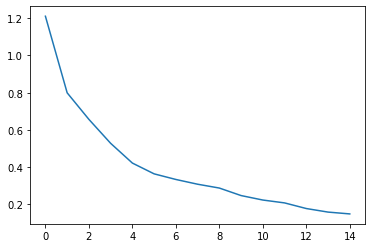

In [43]:
plt.plot(linear_loss)

In [47]:
test_data = next(iter(test_loader))
print(test_data)
x = test_data[:, :seq_length].to(device).float()
print(x)
model(x)

tensor([[ 3.0025,  1.4425,  3.2191,  2.6897,  1.6684,  2.9446,  2.4261,  0.5689,
          3.4429,  3.3586,  2.9953,  1.7905,  3.0199,  2.2264,  0.9716,  3.1949,
          3.1606,  2.7676,  1.8018,  2.8436,  2.1114,  1.1388,  2.9849,  3.0005,
          2.6299,  1.6793,  2.8206,  2.2867, -0.6088,  3.8445,  3.7936,  3.4705,
          1.6391,  3.3828,  2.5043, -2.3274,  4.3554,  4.1440,  3.8342,  1.8149,
          3.4698,  2.2551,  1.7445,  2.8047,  2.4761,  1.0915,  3.1307,  2.9910,
          2.5652,  1.9913,  2.4533,  0.9506],
        [ 1.0986,  2.9680,  2.7484,  2.3579,  2.0006,  2.1000,  0.1583,  3.3308,
          3.4824,  3.2458,  0.8655,  3.6089,  3.1335,  2.5837,  2.4543,  1.7875,
          2.3804,  1.3441,  2.3919,  2.0577,  1.0310,  2.8703,  2.9753,  2.7175,
          1.1099,  3.2450,  2.9793,  2.4723,  2.2466,  1.9574,  1.7820,  1.5537,
          1.5410,  0.6283,  2.6088,  3.1146,  3.0960,  1.2419,  3.3156,  2.8300,
          2.0976,  2.6680,  1.1045,  2.9386,  2.7442,  2.3682, 

tensor([[ 1.7912,  3.2855,  2.9700,  1.6435,  2.7851,  2.3862,  0.6350,  3.3684,
          3.4225,  2.2731],
        [ 3.1510,  2.5757,  2.8094,  2.2396,  2.2573,  0.3416,  3.5286,  3.5538,
          3.2658,  1.5375],
        [ 3.6618,  3.1932,  3.1032,  1.8557,  2.6540,  1.8214,  2.5723,  0.5479,
          3.1285,  2.4189],
        [-1.7418,  3.7333,  4.1836,  3.7658,  1.7126,  3.6580,  2.5853,  1.0990,
          3.2470,  2.7655],
        [ 2.8132,  2.8645,  3.1039,  0.9086,  3.4361,  2.8518,  2.7423,  2.1855,
          2.1095,  2.4948],
        [ 3.5860,  2.6547,  2.8375,  2.1549,  1.6209,  2.1135,  0.6605,  3.2495,
          3.0298,  2.6657],
        [ 3.2335,  2.2935,  2.8031,  2.1609,  2.0847,  0.3276,  3.5168,  3.5005,
          3.2199,  1.5978],
        [ 2.7345,  1.1143,  3.4668,  2.8193,  2.3248,  2.2560,  2.0688,  1.5870,
          1.8944,  3.0746],
        [ 2.9015,  1.7641,  3.3001,  2.5088,  1.0516,  3.0319,  3.3027,  2.5518,
          2.2392,  3.0809],
        [-0.3104,  